In [1]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sys
sys.path.append('../Codes/')
from models import *
from Epi_models import*
from functions import *
import networkx as nx
import matplotlib.animation as animation
import seaborn
def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
Text_files_path = '../../../../Dropbox/Research/Epidemiology_2020/Text_files/'

%autosave 60

Autosaving every 60 seconds


## Functions

In [2]:
def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
    
def my_power_law_function(x,a,b,c):
    return a + b*(x-1)**(-c)

def my_linear_function(x, a, b):
    return a+b*x

def est(beta, gamma):
    lambda1 = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2))-1)*((sigma+gamma)/2)
    return 1/lambda1

def est0(beta, gamma):
    lambda0 = (((beta)/(gamma))-1)*gamma
    return 1/lambda0


# Deterministic Model

t = 14.50


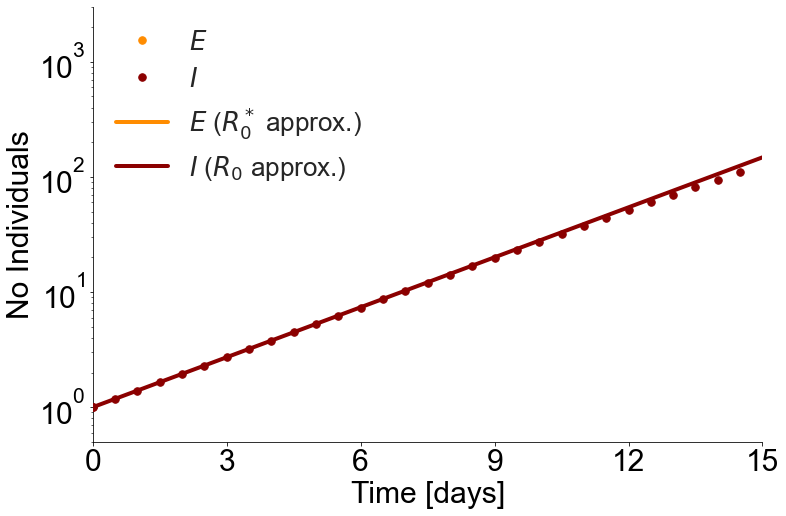

In [3]:
N = 2000
gamma = 1/6
beta = 3.0*gamma
sigma = 1000
initI = 1
T_total = 15 #for R0 = [1.2, 2.0, 3.0, 4.5] use [260,  60,  30,  20] if sigma = 1/4
             #for R0 = [1.2, 2.0, 3.0, 4.5] use [150,  30,  15,   5] if sigma = 1000
    
model_det = SEIRSModel(initN = N,beta=beta, sigma=sigma, gamma=gamma, 
                          theta_E=0, psi_E = 0, theta_I=0.0, psi_I =0.0, initI =initI, initD_E=0,
                         sigma_D = 0, gamma_D = 0, mu_D = 0, mu_I=0)
model_det.run(T=T_total, dt=0.5)

## Analytical Solution 
lambda1, lambda2, time, E_solution, I_solution, sol_total_approx, I_max_2 = run_deterministic(N, beta, sigma, gamma, T_total, folder = Text_files_path+'Deterministic/')

## Plot
fig, ax = model_det.figure_infections(ylim=20, xlim = 15, plot_R = False, plot_I = 'line', plot_E = 'line',
                        plot_S = False, combine_D=False, plot_D_I='line',dashed_reference_results = False,
                        plot_percentages=False, show = False)
#ax.plot(time, sol_total_approx, 'k-', label = r'$E+I$ ($R_0^*$ approx.)', ms = 10, linewidth = 4)
#ax.plot(time, E_solution+I_solution, 'k-', label = r'Total_I$_{approx}$', ms = 10, linewidth = 4)
ax.plot(time, E_solution, '-', color = 'darkorange', label = r'$E$ ($R_0^*$ approx.)', ms = 10, linewidth = 4)
ax.plot(time, I_solution, '-', color = 'darkred', label = r'$I$ ($R_0$ approx.)', ms = 10, linewidth = 4)

ax.set_xlabel('Time [days]', fontsize = 30)
ax.set_ylabel('No Individuals', fontsize = 30)
ax.legend(loc = 2, fontsize = 26, frameon=False)
ax.tick_params('both',labelsize = 30)
ax.set_yscale('log')
ax.set_ylim(0.5,3000)
ax.set_xticks(time[::int(T_total/5)]);

#fig.savefig('../Figures/Control/Deterministic/solutionEI.pdf')

<Figure size 432x288 with 0 Axes>

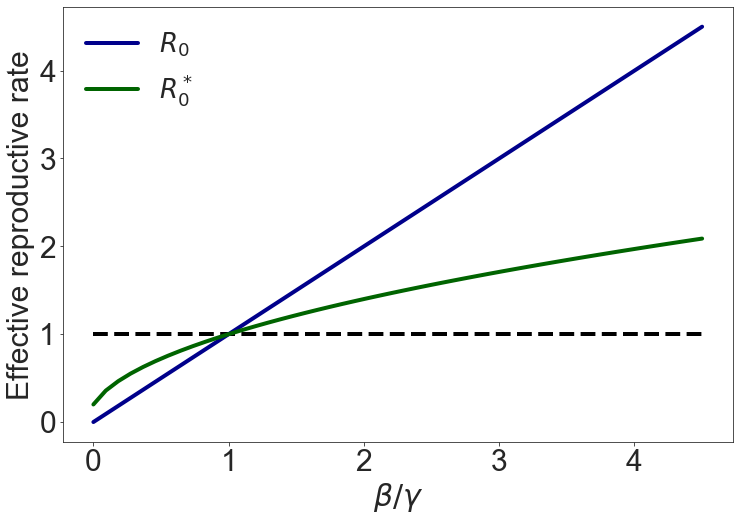

In [7]:
sigma = 1/4
gamma = 1/6
beta = np.linspace(0, 4.5)*gamma
GT0 = (((beta)/(gamma)))
GT = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2)))
seaborn.set_style('ticks')
seaborn.despine()
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(beta/gamma, GT0, color='darkblue', label = '$R_0$', linewidth = 4)
ax.plot(beta/gamma, GT, color='darkgreen', label = '$R_0^*$', linewidth = 4)
ax.hlines(1,0,4.5, linestyles='dashed', linewidth = 4)
ax.set_xlabel(r'$\beta/\gamma$', fontsize = 30)
ax.set_ylabel(r'Effective reproductive rate', fontsize = 30)
ax.tick_params('both', labelsize=30)
ax.legend(fontsize = 26, frameon=False)
fig.savefig('../Figures/Deterministic/growth_rates.pdf')

<Figure size 432x288 with 0 Axes>

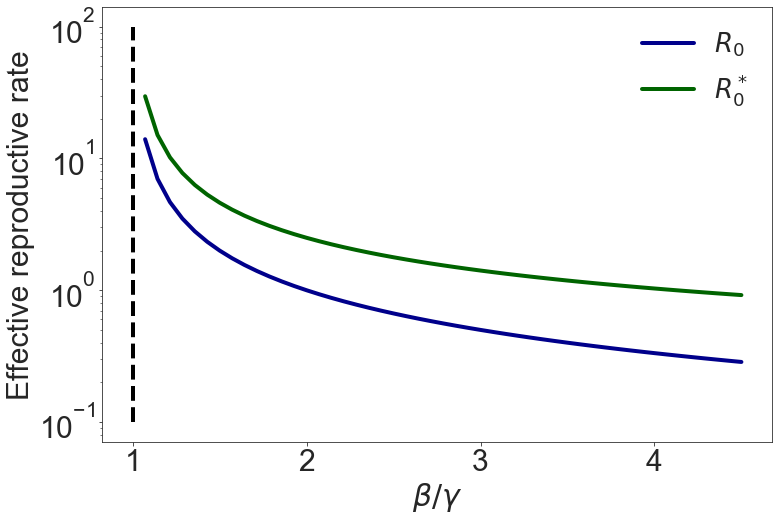

In [14]:
sigma = 1/4
gamma = 1/6
beta = np.linspace(1, 4.5)*gamma
GT0 = (((beta)/(gamma)))
GT = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2)))
seaborn.set_style('ticks')
seaborn.despine()
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(beta/gamma, 1/(GT0-1), color='darkblue', label = '$R_0$', linewidth = 4)
ax.plot(beta/gamma, 1/(GT-1), color='darkgreen', label = '$R_0^*$', linewidth = 4)
ax.vlines(1,0.1,100, linestyles='dashed', linewidth = 4)
ax.set_xlabel(r'$\beta/\gamma$', fontsize = 30)
ax.set_ylabel(r'Effective reproductive rate', fontsize = 30)
ax.tick_params('both', labelsize=30)
ax.set_yscale('log')
ax.legend(fontsize = 26, frameon=False)
fig.savefig('../Figures/Deterministic/establishment.pdf')

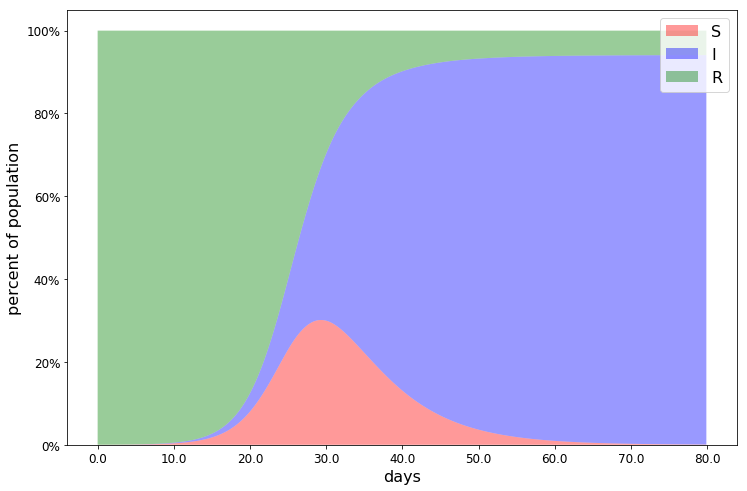

In [14]:
#Run SIR model
N = 8000
n0 = 1
beta = 1/2
gamma = 1/6
T_time = 80
model = EpiModel(N=N, I0=n0, beta=beta, gamma=gamma)
t, S, n, R = model.run(runtime=T_time, dt= 0.1)
fig, ax = plt.subplots(figsize=(12,8))
ax.stackplot(t, np.array([n,R,S])/N,labels=['S','I', 'R'], colors = ['r', 'b', 'g'], alpha = 0.4)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()], size = 12)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_xlabel('days', fontsize = 16)
ax.set_ylabel('percent of population', fontsize = 16)
ax.legend(fontsize = 16)
fig.savefig('../Figures/Deterministic/example_epidemics.pdf')

In [17]:
#Run SIR model
N = 8000
n0 = 1
beta = 1/2
gamma = 1/6
T_total = 10 #use 25 for \beta = 1/4 and 10 for \beta = 1/2
model = EpiModel(N=N, I0=n0, beta=beta, gamma=gamma)
t, S, n, R = model.run(runtime=T_total, dt= 0.1)
I_max = n[-1]
print(I_max)

26.924094496148268


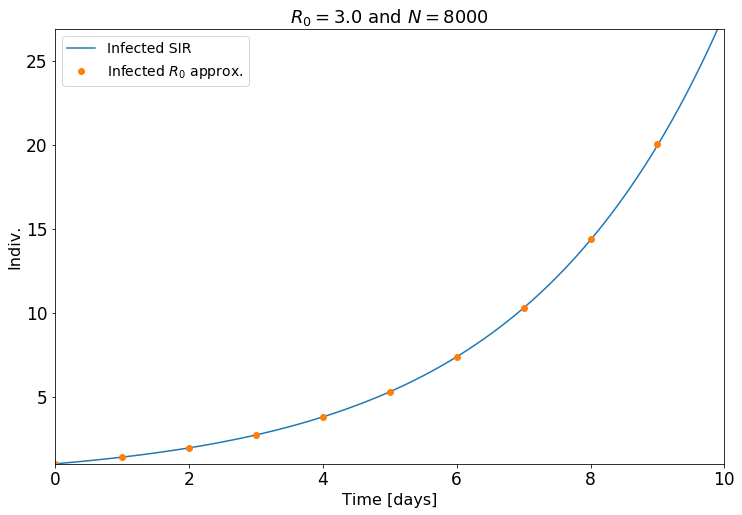

In [18]:
infec = np.array([1])
time_infec = np.array([0])
for i in range(int(T_total)):
    infec = np.append(infec,np.exp(((beta/gamma - 1)/6)*(i+1)))
    #time_infec = np.append(time_infec,time_infec[-1]+(6*np.log(2))/(2))
    time_infec = np.append(time_infec,time_infec[-1]+1)
fig, ax = plt.subplots(figsize=(12,8))
#ax.stackplot(t, [S,n,R],labels=['Susceptible','Infected', 'Recovered'])
#ax.plot(t, S, label = 'Susceptible')
ax.plot(t, n,'-', label='Infected SIR')
ax.plot(time_infec, infec,'.',ms = 12, label='Infected $R_0$ approx.')
ax.legend(fontsize=14)
ax.set_xlabel('Time [days]', fontsize = 16)
ax.set_ylabel('Indiv.', fontsize = 16)
ax.set_title(r'$R_0 = %.01f$ and $N = %.0f$'%(beta/gamma, N), fontsize = 18)
ax.tick_params(labelsize = 17)
plt.xlim(0,T_total)
plt.ylim(1,I_max)
#plt.yscale('log')
plt.savefig('../Figures/Deterministic/7_days_no_replacement/dynamics_R0%.1f_N%.0f.pdf'%(beta/gamma, N))

(<Figure size 864x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x181bf25cc0>)

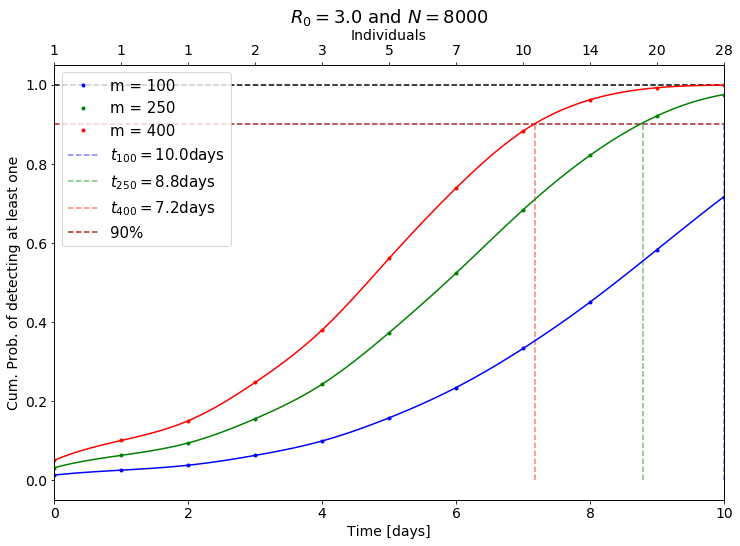

In [19]:
folder = '../Figures/Deterministic/7_days_no_replacement/'
sample_sizes = [100, 250, 400]
colors = ['b', 'g', 'r']
#plot_prob_time(T_total, sample_sizes, beta/gamma, N, time_infec, infec, colors, folder = folder)
#plot_prob_ind(I_max, sample_sizes, beta/gamma, N, time_infec, infec, colors)
plot_cum_prob_time(T_total, sample_sizes, beta/gamma, N, time_infec, infec, colors, folder = folder)
#plot_cum_prob_ind(I_max, sample_sizes, beta/gamma, N, time_infec, infec, colors)

In [25]:
a = 1